# K Nearest Neighbor

# Starting Off

We are going to be using the Pima Native Americans diabetes dataset. Can we use KNN to classify people correctly and then predict if someone will have diabetes?

# Implementing a K-Nearest Neighbors Model

## Objective: 
- To be able to implement a KNN classification model, and utilize a visualization to identify the best value of K.

## Agenda

- What is the **K-nearest neighbors** classification model?
- How do you use the sklearn grid search function?


## K-nearest neighbors (KNN) classification

**Lazy learning** or **Instance-based (IB)** learning methods simply store the training examples and postpone the generalization (building a model) until a new instance must be classified or prediction made.

**Non-parametric models** assume that the data distribution cannot be defined in
terms of such a finite set of parameters.

### How does the KNN algorithm work?

### What should the grey point be?

<img src='img/scenario.png' width=500/>

## KNN has the following basic steps:

<img src='img/knn-process.png' width=500/>

### Voting

How to break ties:

1. When doing a binary classification, often use a odd K to avoid ties.
2. Multiple approaches for Multiclass problems:
    - Reduce the K by 1 to see who wins.
    - Weight the votes based on the distance of the neighbors

### Example training data

This example uses a multi-class problem and each color represents a different class. 

### KNN classification map (K=1)

![1NN classification map](img/04_1nn_map.png)

### KNN classification map (K=5)

![5NN classification map](img/04_5nn_map.png)

## A bit more math

### Euclidean Distance

**Euclidean distance** refers to the distance between two points. These points can be in different dimensional space and are represented by different forms of coordinates. In one-dimensional space, the points are just on a straight number line.



## A bit more math
### Measuring distance in a 2-d Space

In two-dimensional space, the coordinates are given as points on the x- and y-axes

![alt text](img/euclidean-distance.png)

## A bit more math
### Measuring distance in a 3-d Space

In three-dimensional space, x-, y- and z-axes are used. 

$$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 +  (z_1-z_2)^2}$$
![alt text](img/vectorgraph.jpg)

## A bit more math
### Euclidean Distance Equation
![alt text](img/euclidean-equation.png)

The source of this formula is in the Pythagorean theorem. 

## Implementing the KNN Classifier with SKlearn

## Reviewing the Pima dataset

## Loading the data


[following this analysis for part of this section](https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed)

- Can minimum value of below listed columns be zero (0)?
- On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [1]:
import pandas as pd
import numpy as np

diabetes = pd.read_csv('diabetes.csv')

In [2]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes[zero_cols] = diabetes[zero_cols].replace(0,np.NaN)

In [5]:
print(diabetes.shape)

(768, 9)


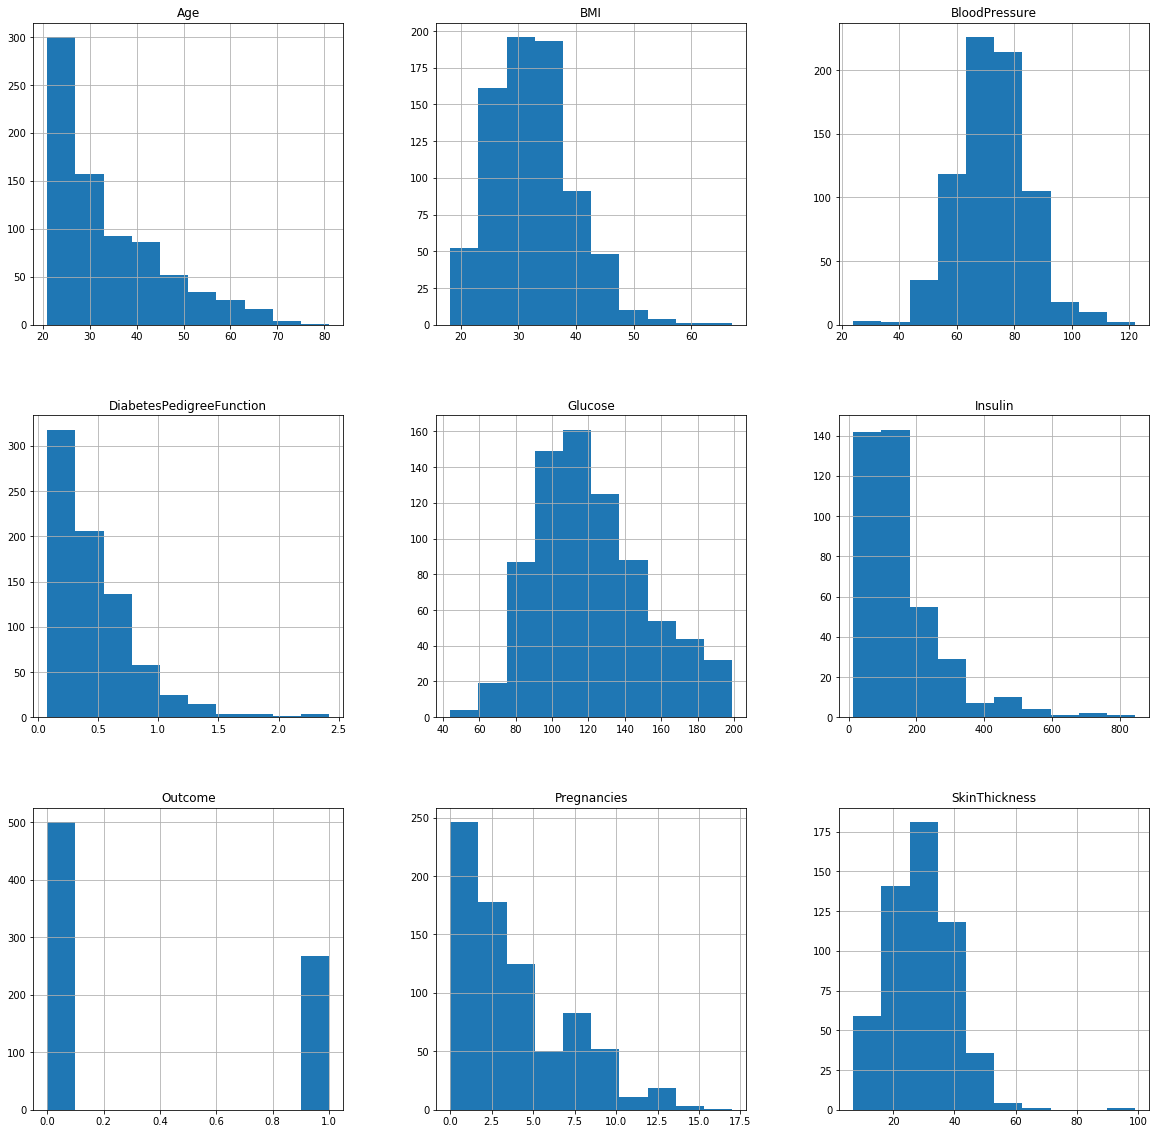

In [4]:
# Using distributions to impute missing values
%matplotlib inline
_ = diabetes.hist(figsize=(20,20))

In [20]:
diabetes['Glucose'].fillna(diabetes['Glucose'].mean(), inplace=True)
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(), inplace=True)
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median(), inplace=True)
diabetes['Insulin'].fillna(diabetes['Insulin'].median(), inplace=True)
diabetes['BMI'].fillna(diabetes['BMI'].median(), inplace=True)

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(diabetes.drop(["Outcome"],axis=1)),
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                          'BMI', 'DiabetesPedigreeFunction', 'Age'])

y = diabetes.Outcome

In [7]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995
1,-0.844885,-1.202229,-0.517645,-0.014657,NaN,-0.846404,-0.365061,-0.190672
2,1.233880,2.009241,-0.679278,NaN,NaN,-1.323254,0.604397,-0.105584
3,-0.844885,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549
4,-1.141852,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496
5,0.342981,-0.186356,0.128887,NaN,NaN,-0.990904,-0.818079,-0.275760
6,-0.250952,-1.431620,-1.810709,0.271950,-0.569426,-0.210604,-0.676133,-0.616111
7,1.827813,-0.219126,NaN,NaN,NaN,0.410747,-1.020427,-0.360847
8,-0.547919,2.468022,-0.194379,1.513914,3.266189,-0.282854,-0.947944,1.681259
9,1.233880,0.108575,1.906851,NaN,NaN,NaN,-0.724455,1.766346


In [8]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## scikit-learn 4-step modeling pattern

![steps](img/sklearnsteps.png)

**Step 1:** Import the class you plan to use

In [9]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)

**Class specifications**
- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [11]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [12]:
knn.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [26]:
# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [27]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.6875
F1: 0.5774647887323944


In [28]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[91 32]
 [28 41]]


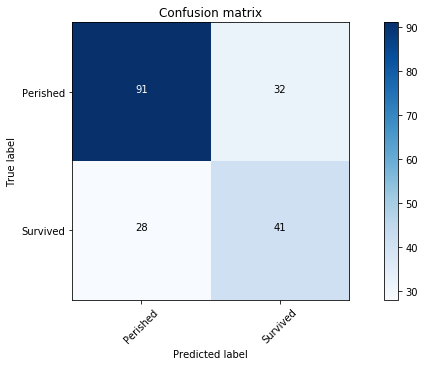

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [14]:
!pip install mlxtend

    100% |████████████████████████████████| 1.3MB 4.4MB/s ta 0:00:011


ValueError: Filler values must be provided when X has more than 2 training features.

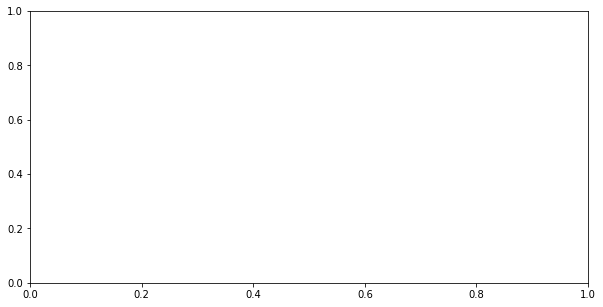

In [42]:
from mlxtend.plotting import plot_decision_regions
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      X_highlight=X_test.values)

plt.title('KNN with Diabetes Data')
plt.show()



## Using a different value for K

In [30]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [31]:
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.796875
F1: 0.6929133858267716


In [32]:
from sklearn.metrics import classification_report  

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       123
           1       0.76      0.64      0.69        69

   micro avg       0.80      0.80      0.80       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.79      0.80      0.79       192



Confusion Matrix, without normalization
[[109  14]
 [ 25  44]]


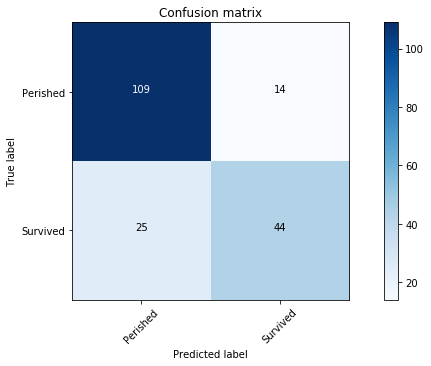

In [33]:
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

#### Search for an optimal value of K for KNN


In [34]:
k_range = list(range(1, 4))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = metrics.f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.6893187638226052, 0.6854678699436763, 0.7578237734487735]


#### Visual comparison of different $K$s

This is not an ROC curve

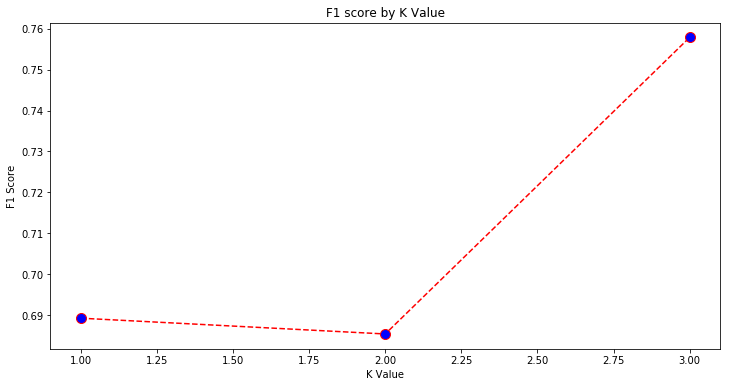

In [35]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

### What value of K performs best on our Test data?

Here we use F score, what other metrics could we use?

### How do you think K size relates to our concepts of bias and variance?

![alt text](img/K-NN_Neighborhood_Size_print.png)

## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)

- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)